<a href="https://colab.research.google.com/github/BlueBlaze6335/Covid19/blob/master/FractalAnalysis(TerraBlueXT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

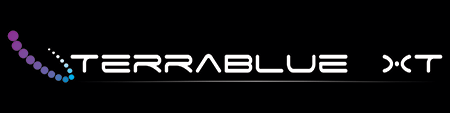

# Introduction:

In this notebook , we are going to study the time series data of two signals of subjects which are labeled as A , B and C. The time series has intervals of 10miliseconds each for the three Labels , which are suspected to be three different subjects examined for EEG signals. In this notebook we are going to study the data and get deeper insights of the data using fractal analysis which include methods like the ***Hurst Exponent  and Detrended Fractal Analysis***. 

***With the limited information provided about the signals and the methods , this notebook is about my perception of this dataset.***  

In [ ]:
pip install nolds

* **In this notebook we have used the *nolds* Library to do the fractal 
analysis**

In [ ]:
import pandas as pd
data = pd.read_csv("/intern_dataset.csv")
print(data.head())
print(data.shape)

### About the Dataset

* The Dataset has Four Columns marked as - **Time , Signal1 , Signal2 and Label** and in total has ***Nine lakhs, twelve thousand*** datasets.


* ***Time*** **-** Time data of the corresponding to the signals : with various dates and time in format - **"YYYY-MM-DD" & "HH:MM:SS.mS"**


* ***Signal1 -*** Data corresponding to a Signal with values of huge range and upto 6 decimal places.


* ***Signal2 -*** Data corresponding to a Signal with small values and also upto 6 decimal places.

* ***Label -*** Character values marked as ***A, B & C*** , which probably denotes three different *Subjects*.


In [ ]:
time=data['Time']
time=time.str.split(" ", n = 1, expand = True)

time=time.rename(columns={0:'Date',1:'Time'},inplace=False)
print(time.head())
data=data.drop(['Time'],axis=1)
data=data.join(time)

* Separating the **"Time"** Data into two parts - **"Date" and "Time"**. The reason for this is the data changes with each *10 miliseconds* , thus datewise data representation would lead to the loss of vital information.

* As we can see , the steps done above are :- 


1.   Creation of a Dataframe to store the Time data.
2.   Separation of the the Date and Time , by spliting the space separated string.
3. Renaming the new Data frame with two separate columns.
4. Droping the Time Column from the original Data 
%. Joining the Time dataframe with the original Data frame.



In [ ]:
data_c=data[data.Label=='C']
print(data_c.head(5))
Cdata=data_c['Signal1'].values.tolist()
Cdata2=data_c['Signal2'].values.tolist()

data_b=data[data.Label=='B']
print(data_b.head(5))
Bdata=data_b['Signal1'].values.tolist()
Bdata2=data_b['Signal2'].values.tolist()

data_a=data[data.Label=='A']
print(data_a.head(5))
Adata=data_a['Signal1'].values.tolist()
Adata2=data_a['Signal2'].values.tolist()

* In the above cell, we are segregating the Signal data with respect to their ***Labels***. 
* Here , we have generated lists of **Signal1** data and **Signal2** data for each *Labels* , i.e. , ***A, B, C***. 

In [57]:
maxa=max(Adata)
mina=min(Adata)
print("Range for A -",mina,"-",maxa)
for i in range(len(Adata)):
    Adata[i] = (Adata[i] - mina) / (maxa- mina)
maxb=max(Bdata)
minb=min(Bdata)
print("Range for B -",minb,"-",maxb)
for i in range(len(Bdata)):
    Bdata[i] = (Bdata[i] - minb) / (maxb- minb)
maxc=max(Cdata)
minc=min(Cdata)
print("Range for C -",minc,"-",maxc)
for i in range(len(Cdata)):
    Cdata[i] = (Cdata[i] - minc) / (maxc- minc)

Range for A - -2934.328326830049 - 67692.65202166262
Range for B - -1110.867137022769 - 67099.77258093233
Range for C - 4111.708944611873 - 65678.56241217528


* In the above cell , the data of **Signal1** has been normalised for all three labels , using ***Min-Max normalisation***. 
* As we can see the ranges of the data for each Label is huge ! thus we need to normalize them and bring their value in the range ***0.0-1.0***. This would allow us to compare the two signals as the **Signal2** has a range of small values of the same range. Thus Plotting these Two **Signals** without normalising the other would make the data from **Signal2** impossible to understand ( due to this huge range in **Signal1** , the plot of **Signal2** would tend to look like a ***Straight Line***).



---

---





# Plotting the Time-Series Data of individual Subjects. 

Here , **Signal1** of the three subjects - ***A,B,C*** are plotted , along with the **Signal2**. 

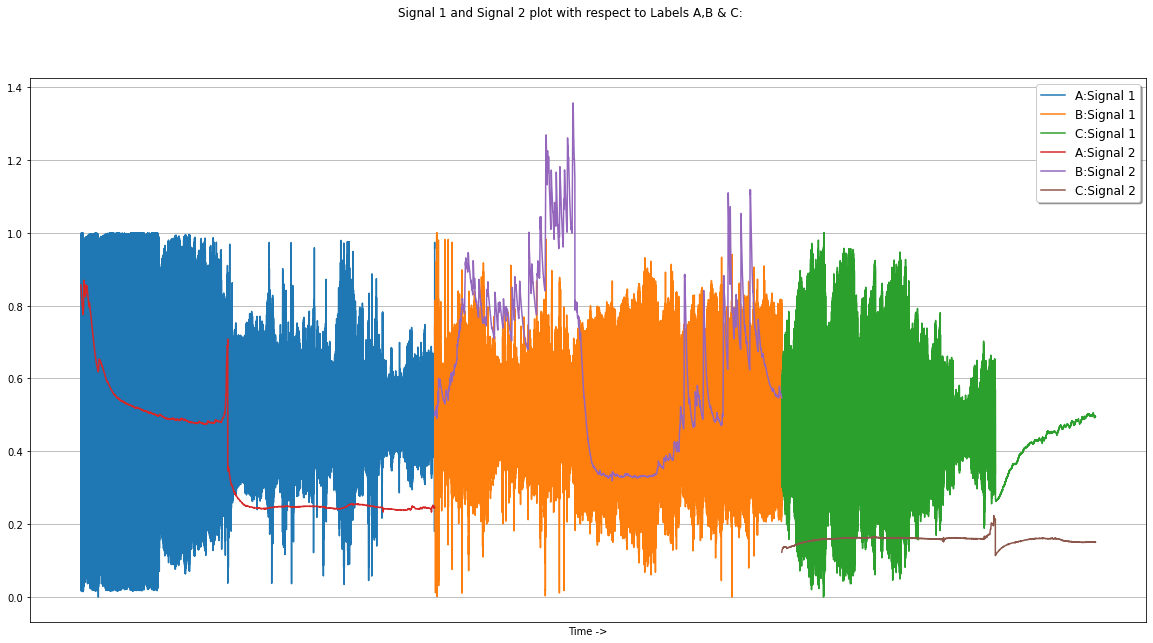

In [44]:
data['Time']=pd.to_datetime(data['Time'],format='%H:%M:%S.%f')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

seconds = mdates.SecondLocator()   # every year
microsec = mdates.MicrosecondLocator()  # every month
#day=mdates.DayLocator()
date_fmt = mdates.DateFormatter('%H:%M:%S.%f')


fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle("Signal 1 and Signal 2 plot with respect to Labels A,B & C:")
plt.xlabel("Time ->")


ax.plot(data_a['Time'], Adata ,label='A:Signal 1')
ax.plot(data_b['Time'], Bdata,label='B:Signal 1')
ax.plot(data_c['Time'], Cdata,label='C:Signal 1')
ax.plot(data_a['Time'], Adata2,label='A:Signal 2')
ax.plot(data_b['Time'], Bdata2,label='B:Signal 2')
ax.plot(data_c['Time'], Cdata2,label='C:Signal 2')

legend = ax.legend(loc='upper right', shadow=True, fontsize='large')

# Put a nicer background color on the legend.
legend.get_frame()

ax.xaxis.set_major_locator(seconds)
ax.xaxis.set_major_formatter(date_fmt)
ax.xaxis.set_minor_locator(microsec)
ax.format_xdata = mdates.DateFormatter('%S.%f')
plt.grid(True)

#fig.autofmt_xdate()
plt.show()

* In the above plot , Signal1 with respect to A has a continuous series of data , with regular peaks and troughs but it transforms to an irregular graph. That might be because the irregular data corresponds to a different date. Now with respect to the **Signal2** , value above ***0.4-0.5*** has a **steady high peaks** , where as value below that shows decrease in values of peaks with increase in ***irregularities***.
* Similarly , in case of both ***B and C*** , the relations between **Signal2** and **Signal1** is evident. Although the nature of **Signal1** of ***B and C*** have no relation with each other or with ***A's***. Here ***B*** has sporadic peaks , with **Signal2** reaching its peaks with ***sharp rise and falls***. 
* For ***C*** , **Signal2** value is too low , thus there is no regualrity in the **Signal1**. One can see that in the end , the difference between the values of **Signal1** is very low.



---

---




# Fractal Analysis Using Hurst Exponent and DFA .

The analysis is done with the Help of ***nolds*** Library. 

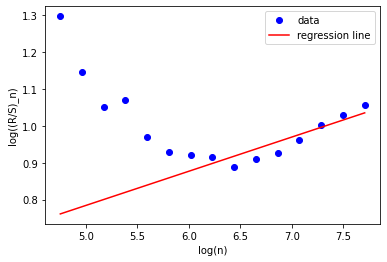

Hurst Exponent A Signal1:
 0.5926950673252944


In [58]:
import nolds

print("Hurst Exponent A Signal1:\n",nolds.hurst_rs(Adata,debug_plot=True))


* The **Hurst Exp** of **Signal1** for ***A*** , is 0.59 , which indicates a time series with ***long-term positive autocorrelation***, meaning both that a high value in the series will probably be followed by another high value and that the values a long time into the future will also tend to be high.

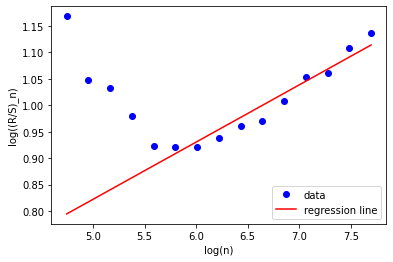

Hurst B Exponent Signal1:
 0.6082193903732964


In [59]:
print("Hurst B Exponent Signal1:\n",nolds.hurst_rs(Bdata,debug_plot=True))


* Similar to the **H value** for ***A*** , for ***B*** to the value is more , even greater than ***A's***. Thus the signals are a persistent process. 

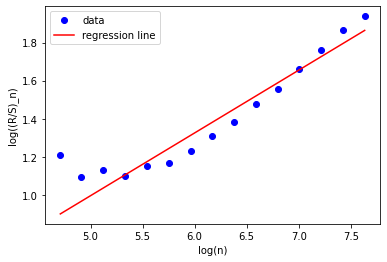

Hurst C Exponent  Signal1:
 0.8292981622514956


In [60]:
print("Hurst C Exponent  Signal1:\n",nolds.hurst_rs(Cdata,debug_plot=True))


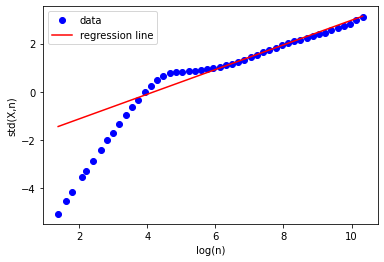

DFA A Signal1:
 0.5114918677093921


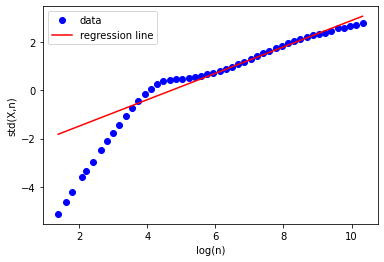

DFA B Signal1:
 0.547275464642663


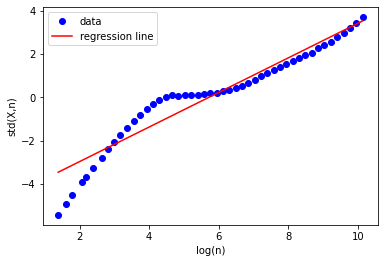

DFA C Signal1:
 0.7986382286757445


In [61]:
print("DFA A Signal1:\n",nolds.dfa(Adata,debug_plot=True))
print("DFA B Signal1:\n",nolds.dfa(Bdata,debug_plot=True))
print("DFA C Signal1:\n",nolds.dfa(Cdata,debug_plot=True))

* Now the **DFA** values are used to analyse ***long-memory process***. 
* A value >0.5 means the data are ***correlated***. 
* Here all the values for ***A,B and C*** are greater than 0.5 , which means the series are ***correlated***. 

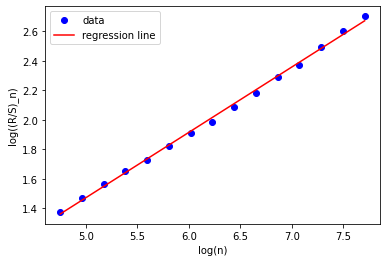

Hurst A Exponent  Signal2:
 0.9436455006528914


In [62]:
print("Hurst A Exponent  Signal2:\n",nolds.hurst_rs(Adata2,debug_plot=True))



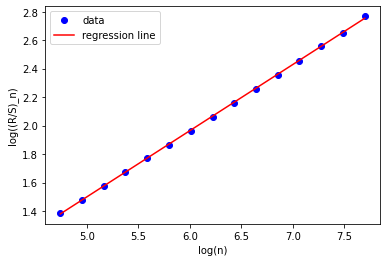

Hurst B Exponent  Signal2:
 0.9656017582527


In [63]:
print("Hurst B Exponent  Signal2:\n",nolds.hurst_rs(Bdata2,debug_plot=True))


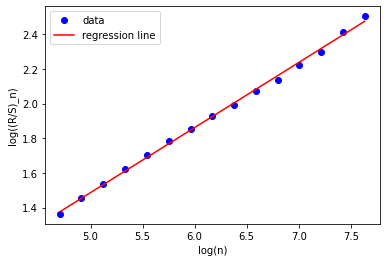

Hurst C Exponent  Signal2:
 0.8748319171563599


In [64]:
print("Hurst C Exponent  Signal2:\n",nolds.hurst_rs(Cdata2,debug_plot=True))

* For the **Signal2** , the Hurst Exponent has ***High values*** , which correspond to positive long-range correlations. One can see that the regression line and the data lie very close to each other , thus supporting the high values.

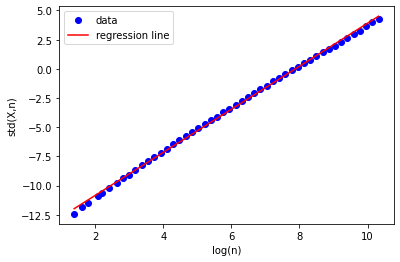

DFA A Signal2:
 1.8449455786257136


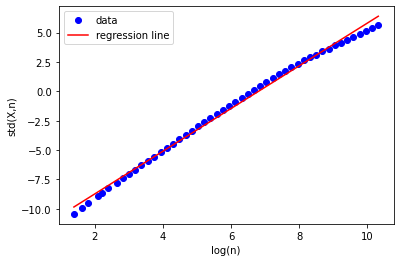

DFA B Signal2:
 1.817671427084764


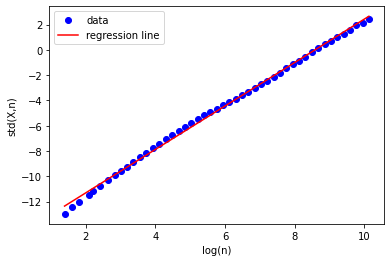

DFA C Signal2:
 1.716038086183059


In [65]:
print("DFA A Signal2:\n",nolds.dfa(Adata2,debug_plot=True))
print("DFA B Signal2:\n",nolds.dfa(Bdata2,debug_plot=True))
print("DFA C Signal2:\n",nolds.dfa(Cdata2,debug_plot=True))

* The Standard deviation versus the log(n) graphs show that the data and regression line are overlapping , thus the high values are generated. This suggests that the data is ***Un-Stationary or Unbounded***.



---

---

---

---









# Conclusion:

Both **Signal1** values and **Signal2** values have correlations to each others , however what i have understood is that the **Signal2** has ***more significance***, with a clean aspect for classifiers to work upon the data. However , one cannot depend upon a single series of data , or a feature to classify and draw conclusion for such a delicate matter. With better pre-processing techniques , the **Signals** can be used for much refined analysis. 



---

---





## Note to the reader:

Thank you for going through the Notebook. This was a learning experience , dealing with real world problem , that could help people in need. I am looking forward to learn more about this domain.




By Padmanabha Banerjee.